In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [38]:
def read_img(img_path):
    """
        Read grayscale image
        Inputs:
        img_path: str: image path
        Returns:
        img: cv2 image
    """
    return cv2.imread(img_path, 0)

In [39]:
def padding_img(img, filter_size=3):
    """
    The surrogate function for the filter functions.
    The goal of the function: replicate padding the image such that when applying the kernel with the size of filter_size, the padded image will be the same size as the original image.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter
    Return:
        padded_img: cv2 image: the padding image
    """
    # dividing to get the size of padded part
    pad_size = int(filter_size/2)
    h, w = img.shape

    # create a temporary image with the size like that
    padded_img = np.zeros((h + 2 * pad_size, w + 2 * pad_size), dtype=img.dtype)

    # copying original image into padded_img
    padded_img[pad_size : -pad_size, pad_size : -pad_size] = img

    # pad rows
    padded_img[:pad_size, pad_size : - pad_size] = img[0,:]
    padded_img[- pad_size:, pad_size : - pad_size] = img[h - 1, :]

    # pad columns
    padded_img[pad_size : - pad_size, :pad_size] = img[:,0].reshape(-1, 1)
    padded_img[pad_size : - pad_size, - pad_size:] = img[:,w - 1].reshape(-1, 1)

    # pad 4 corners
    padded_img[:pad_size, :pad_size] = img[0,0]
    padded_img[:pad_size, - pad_size:] = img[0,-1]
    padded_img[- pad_size:, :pad_size] = img[-1,0]
    padded_img[- pad_size:, - pad_size:] = img[-1,-1]

    return padded_img

In [40]:
def mean_filter(img, filter_size=3):
    """
    Smoothing image with mean square filter with the size of filter_size. Use replicate padding for the image.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter,
    Return:
        smoothed_img: cv2 image: the smoothed image with mean filter.
    """
    h, w = img.shape
    # create a temporary image with the size like that
    mean_img = np.zeros((h,w), dtype=img.dtype)
    padded_img = padding_img(img)
    # select filters
    pad_size = int(filter_size/2)
    mean_win = np.full((filter_size, filter_size), 1/(filter_size * filter_size), dtype=float)
    for i in range(pad_size, h + pad_size):
        for j in range(pad_size, w + pad_size):
            cur_sec = padded_img[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            res = np.multiply(cur_sec, mean_win)
            mean_img[i - pad_size, j - pad_size] = np.sum(res)

    return mean_img      

In [41]:
# image_array = np.array([[1, 2, 3, 4, 5],
#                         [6, 7, 0, 1, 2],
#                         [3, 4, 5, 6, 7],
#                         [0, 1, 2, 3, 4],
#                         [5, 6, 7, 0, 1]])

image_array = np.array([[1,1,2],
                        [1,1,2],
                        [4,4,5]])
filter_size = 3
tmp = np.full((filter_size, filter_size), 1/(filter_size * filter_size), dtype=float)
print(tmp)
hjhj = np.multiply(tmp, image_array)
print(hjhj)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.11111111 0.11111111 0.22222222]
 [0.11111111 0.11111111 0.22222222]
 [0.44444444 0.44444444 0.55555556]]


In [42]:
def median_filter(img, filter_size=3):
    """
        Smoothing image with median square filter with the size of filter_size. Use replicate padding for the image.
        Inputs:
            img: cv2 image: original image
            filter_size: int: size of square filter
        Return:
            smoothed_img: cv2 image: the smoothed image with median filter.
    """
    h, w = img.shape
    # create a temporary image with the size like that
    med_img = np.zeros((h,w), dtype=img.dtype)
    padded_img = padding_img(img)
    pad_size = int(filter_size/2)
    for i in range(pad_size, h + pad_size):
        for j in range(pad_size, w + pad_size):
            tmp = padded_img[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            res = np.median(tmp)
            med_img[i - pad_size, j - pad_size] = res

    return med_img
  # Need to implement here

In [43]:
# image_array = np.array([[1, 2, 3, 4, 5],
#                         [6, 7, 0, 1, 2],
#                         [3, 4, 5, 6, 7],
#                         [0, 1, 2, 3, 4],
#                         [5, 6, 7, 0, 1]])

image_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

med_image = median_filter(image_array)
print(med_image)

[[2 3 3]
 [4 5 6]
 [7 7 8]]


In [44]:
def psnr(gt_img, smooth_img):
    """
        Calculate the PSNR metric
        Inputs:
            gt_img: cv2 image: groundtruth image
            smooth_img: cv2 image: smoothed image
        Outputs:
            psnr_score: PSNR score
    """
    # Need to implement here
    m,n = gt_img.shape
    tmp = np.subtract(gt_img, smooth_img) * np.subtract(gt_img, smooth_img)
    mse = np.sum(tmp) * (1/(m*n))
    if (mse == 0):
        return np.Infinity
    maxf = np.max(gt_img)
    psnr = 10 * np.log10((255 ** 2)/mse)
    return psnr

In [45]:
image_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

med_image = median_filter(image_array)
print(image_array)
print(med_image)
hjhj = psnr(image_array, med_image)
print(hjhj)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 3 3]
 [4 5 6]
 [7 7 8]]
51.65262878979273


In [46]:
def show_res(before_img, after_img):
    """
        Show the original image and the corresponding smooth image
        Inputs:
            before_img: cv2: image before smoothing
            after_img: cv2: corresponding smoothed image
        Return:
            None
    """
    plt.figure(figsize=(12, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(before_img, cmap='gray')
    plt.title('Before')

    plt.subplot(1, 2, 2)
    plt.imshow(after_img, cmap='gray')
    plt.title('After')
    plt.show()

In [47]:
# some basic functions to serve other purposes

def load_show_img(image_path):
    image = cv2.imread(image_path, 0)
    # need to change colors!!!
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

<class 'numpy.ndarray'>


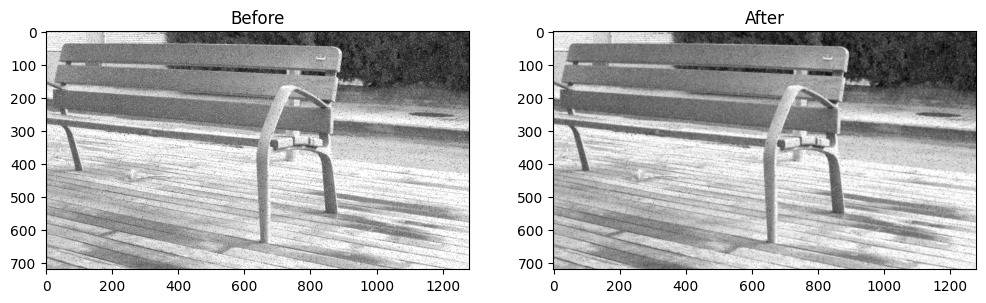

PSNR score of mean filter:  31.605849430056452


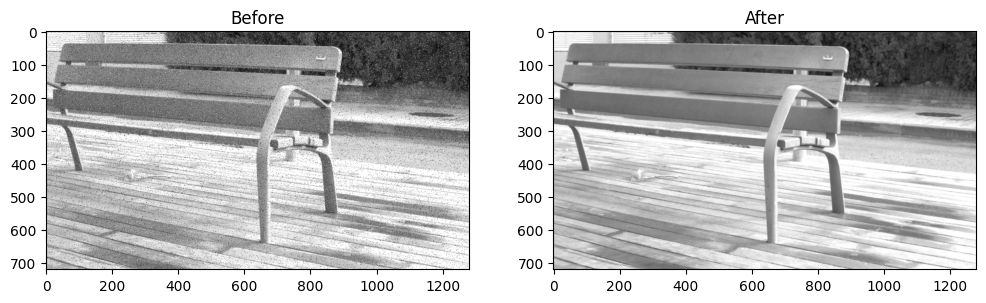

PSNR score of median filter:  37.119578300855245


In [48]:
img_noise = "../ex1_images/noise.png" # <- need to specify the path to the noise image
img_gt = "../ex1_images/noise.png" # <- need to specify the path to the gt image
# img = load_show_img(img_noise)
img = read_img(img_noise)
filter_size = 3
# filter_size = 3
print(type(img))
# # Mean filter
mean_smoothed_img = mean_filter(img, filter_size)
show_res(img, mean_smoothed_img)
print('PSNR score of mean filter: ', psnr(img, mean_smoothed_img))

# # Median filter
median_smoothed_img = median_filter(img, filter_size)
show_res(img, median_smoothed_img)
print('PSNR score of median filter: ', psnr(img, median_smoothed_img))

Text(0.5, 1.0, 'Before')

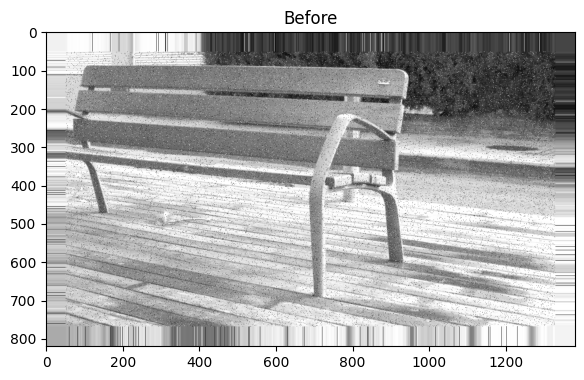

In [59]:
import cv2
cv2.imwrite("mean filter.jpg", mean_smoothed_img)
cv2.imwrite("median filter.jpg", median_smoothed_img)

tmp_img = padding_img(img, 100)
cv2.imwrite("pad_100.jpg", tmp_img)
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.imshow(tmp_img, cmap='gray')
plt.title('Before')